# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [164]:
# Imports
# Packages for numerics + dataframes
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Packages for visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
### YOUR CODE HERE ###
from datetime import datetime

# Packages for OLS, MLR, confusion matrix
### YOUR CODE HERE ###
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [166]:
# Load dataset into dataframe 
df0=pd.read_csv("Automatidata - Dataset.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


Exploratory Data Analysis (EDA) is a crucial step before constructing a multiple linear regression model. Here are some key purposes of EDA in this context:

    1. Understanding Data Structure: EDA helps to familiarize yourself with the dataset, including its dimensions, variable types, and the relationships among variables.

    2. Identifying Patterns and Trends: It allows you to uncover patterns, trends, and insights that might inform the model-building process, such as seasonality or cyclical behaviors.

    3. Detecting Outliers: EDA aids in identifying outliers that may skew results or violate the assumptions of linear regression.

    4. Assessing Assumptions: Linear regression relies on several assumptions (linearity, independence, homoscedasticity, normality). EDA helps assess whether these assumptions hold true for your data.

    5. Feature Selection: By visualizing relationships between dependent and independent variables, you can identify which features are most predictive, helping to reduce dimensionality and improve model performance.

    6. Handling Missing Data: EDA reveals missing values, allowing you to decide on appropriate strategies for imputation or removal.

    7. Understanding Variable Distributions: Analyzing the distribution of each variable can help in transformations, such as normalization or log transformations, to meet model assumptions.

    8. Correlation Analysis: EDA can reveal correlations between variables, guiding feature selection and indicating multicollinearity issues.

    9. Visualizing Relationships: Using scatter plots, heatmaps, or other visualizations helps in understanding relationships and interactions between variables, which can be critical for model interpretation.

    10. Data Transformation Needs: EDA can highlight the need for transformations to stabilize variance or make relationships more linear.

By conducting thorough EDA, you set a solid foundation for constructing a reliable and interpretable multiple linear regression model.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [171]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
print(df0.shape)
print(df0.info())

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [173]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
print(df0.isna().sum())
df0 = df0.drop_duplicates()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


Use `.describe()`.

In [175]:
# Use .describe()
### YOUR CODE HERE ###
print(df0.describe())

         Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  2.269900e+04  22699.000000     22699.000000   22699.000000   
mean   5.675849e+07      1.556236         1.642319       2.913313   
std    3.274493e+07      0.496838         1.285231       3.653171   
min    1.212700e+04      1.000000         0.000000       0.000000   
25%    2.852056e+07      1.000000         1.000000       0.990000   
50%    5.673150e+07      2.000000         1.000000       1.610000   
75%    8.537452e+07      2.000000         2.000000       3.060000   
max    1.134863e+08      2.000000         6.000000      33.960000   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
mean       1.043394    162.412353    161.527997      1.336887     13.026629   
std        0.708391     66.633373     70.139691      0.496211     13.243791   
min        1.000000      1.000000      1.000000      1.000000 

### Task 2b. Convert pickup & dropoff columns to datetime


In [177]:
# Check the format of the data
### YOUR CODE HERE ###
print(df0[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].head())

     tpep_pickup_datetime   tpep_dropoff_datetime
0   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM
1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM
2   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM
3   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM
4  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM


In [178]:
# Convert datetime columns to datetime
### YOUR CODE HERE ###
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [181]:
# Create `duration` column
### YOUR CODE HERE ###
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']).dt.total_seconds() / 60

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [183]:
### YOUR CODE HERE ###
print(df0[['trip_distance', 'fare_amount', 'duration']].describe())

       trip_distance   fare_amount      duration
count   22699.000000  22699.000000  22699.000000
mean        2.913313     13.026629     17.013777
std         3.653171     13.243791     61.996482
min         0.000000   -120.000000    -16.983333
25%         0.990000      6.500000      6.650000
50%         1.610000      9.500000     11.183333
75%         3.060000     14.500000     18.383333
max        33.960000    999.990000   1439.550000


Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

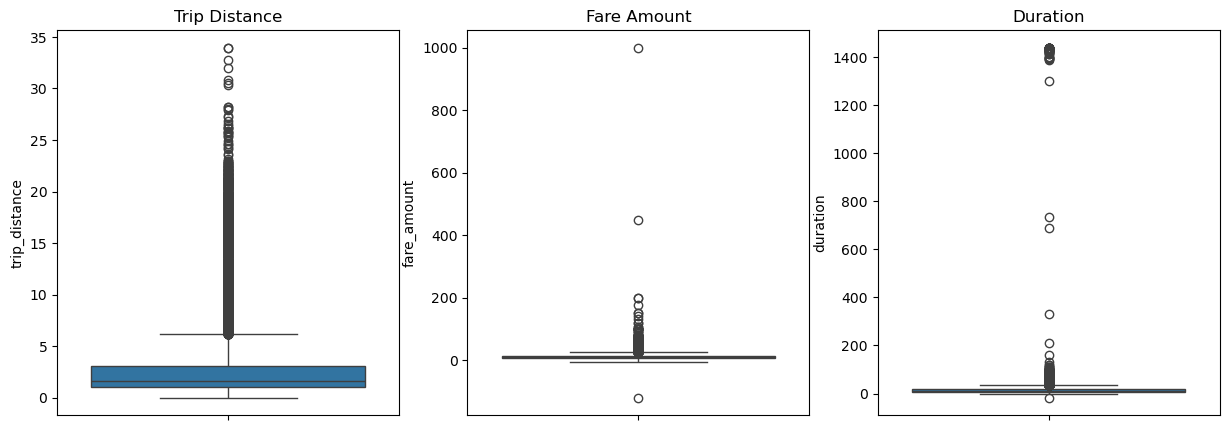

In [186]:
### YOUR CODE HERE ###
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df0['trip_distance'])
plt.title('Trip Distance')

plt.subplot(1, 3, 2)
sns.boxplot(y=df0['fare_amount'])
plt.title('Fare Amount')

plt.subplot(1, 3, 3)
sns.boxplot(y=df0['duration'])
plt.title('Duration')

plt.show()

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

==> ENTER YOUR RESPONSE HERE
1. From the above visauls it seems all three variables contain outliers.
2. The values in trip distance seem beliuevable as there can be few longer trips occasionally.
3. Te lower end for distance and duration can be zero as the trip can be cancelled as soon as the customer gets in, but the fare amount cant be zero as there is base price even for cancelling immediately. But neither of the variables can be negative.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [191]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
sorted_trip_distances = df0['trip_distance'].sort_values().drop_duplicates().head(10)
print(sorted_trip_distances)

22026    0.00
5501     0.01
16827    0.02
21088    0.03
13517    0.04
10146    0.05
14373    0.06
922      0.07
22523    0.08
22035    0.09
Name: trip_distance, dtype: float64


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [193]:
### YOUR CODE HERE ###
zero_distance_count = df0[df0['trip_distance'] == 0].shape[0]
print(f"Number of trips with a distance of 0: {zero_distance_count}")

Number of trips with a distance of 0: 148


#### `fare_amount` outliers

In [195]:
### YOUR CODE HERE ###
print(df0['fare_amount'].describe())

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64


**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [197]:
# Impute values less than $0 with 0
### YOUR CODE HERE ###
df0['fare_amount'] = df0['fare_amount'].apply(lambda x: max(x, 0))

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [199]:
### YOUR CODE HERE ###
'''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
'''
  ### YOUR CODE HERE ###
        # Reassign minimum to zero
        ### YOUR CODE HERE ###

        # Calculate upper threshold
     ### YOUR CODE HERE ###

        # Reassign values > threshold to threshold
      ### YOUR CODE HERE ###

# Impute upper-limit values in fare_amount column based on the interquartile range (IQR)
Q1 = df0['fare_amount'].quantile(0.25)
Q3 = df0['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
upper_threshold = Q3 + (6 * IQR)

# Impute values greater than the upper threshold
df0['fare_amount'] = df0['fare_amount'].apply(lambda x: min(x, upper_threshold))


#### `duration` outliers


In [201]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
print(df0['duration'].describe())

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64


The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [203]:
# Impute a 0 for any negative values
### YOUR CODE HERE ###
df0['duration'] = df0['duration'].apply(lambda x: max(x, 0))

In [204]:
# Impute the high outliers
### YOUR CODE HERE ###
# Impute upper-limit values in duration column based on the interquartile range (IQR)
Q1_duration = df0['duration'].quantile(0.25)
Q3_duration = df0['duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
upper_threshold_duration = Q3_duration + (6 * IQR_duration)

# Impute values greater than the upper threshold
df0['duration'] = df0['duration'].apply(lambda x: min(x, upper_threshold_duration))

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [207]:
# Create `pickup_dropoff` column
### YOUR CODE HERE ###
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + ' ' + df0['DOLocationID'].astype(str)

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [209]:
### YOUR CODE HERE ###
grouped = df0.groupby('pickup_dropoff')['trip_distance'].mean()

`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [211]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [213]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
### YOUR CODE HERE ###

# 2. Map `grouped_dict` to the `mean_distance` column
### YOUR CODE HERE ###
df0['mean_distance'] = df0['pickup_dropoff'].map(grouped_dict)

# Confirm that it worked
### YOUR CODE HERE ###
print(df0[['pickup_dropoff', 'mean_distance']].head())

  pickup_dropoff  mean_distance
0        100 231       3.521667
1         186 43       3.108889
2        262 236       0.881429
3         188 97       3.700000
4          4 112       4.435000


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [215]:
### YOUR CODE HERE ###

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###

# Confirm that it worked
### YOUR CODE HERE ###

# Group by `pickup_dropoff` and calculate the mean duration
grouped_duration = df0.groupby('pickup_dropoff')['duration'].mean()

# Convert `grouped_duration` to a dictionary and remove the `duration` key
grouped_duration_dict = grouped_duration.to_dict()

# Create `mean_duration` column by mapping `grouped_duration_dict` to the `pickup_dropoff` values
df0['mean_duration'] = df0['pickup_dropoff'].map(grouped_duration_dict)

# Confirm that it worked
print(df0[['pickup_dropoff', 'mean_duration']].head())

  pickup_dropoff  mean_duration
0        100 231      22.847222
1         186 43      24.470370
2        262 236       7.250000
3         188 97      30.250000
4          4 112      14.616667


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [217]:
# Create 'day' col
### YOUR CODE HERE ###
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()

# Create 'month' col
### YOUR CODE HERE ###
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()

# Confirm that it worked
print(df0[['tpep_pickup_datetime', 'day', 'month']].head())

  tpep_pickup_datetime       day     month
0  2017-03-25 08:55:43  Saturday     March
1  2017-04-11 14:53:28   Tuesday     April
2  2017-12-15 07:26:56    Friday  December
3  2017-05-07 13:17:59    Sunday       May
4  2017-04-15 23:32:20  Saturday     April


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [219]:
# Create 'rush_hour' col
### YOUR CODE HERE ###

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE ###

In [220]:
### YOUR CODE HERE ###

In [221]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###
# Define the rush hour conditions
def rush_hourizer(row):
    if row['day'] in ['Saturday', 'Sunday']:
        return 0
    hour = row['tpep_pickup_datetime'].hour
    if (6 <= hour < 10) or (16 <= hour < 20):
        return 1
    return 0

# Apply the `rush_hourizer()` function to create the `rush_hour` column
df0['rush_hour'] = df0.apply(rush_hourizer, axis=1)

# Confirm that it worked
print(df0[['tpep_pickup_datetime', 'day', 'rush_hour']].head())

  tpep_pickup_datetime       day  rush_hour
0  2017-03-25 08:55:43  Saturday          0
1  2017-04-11 14:53:28   Tuesday          0
2  2017-12-15 07:26:56    Friday          1
3  2017-05-07 13:17:59    Sunday          0
4  2017-04-15 23:32:20  Saturday          0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

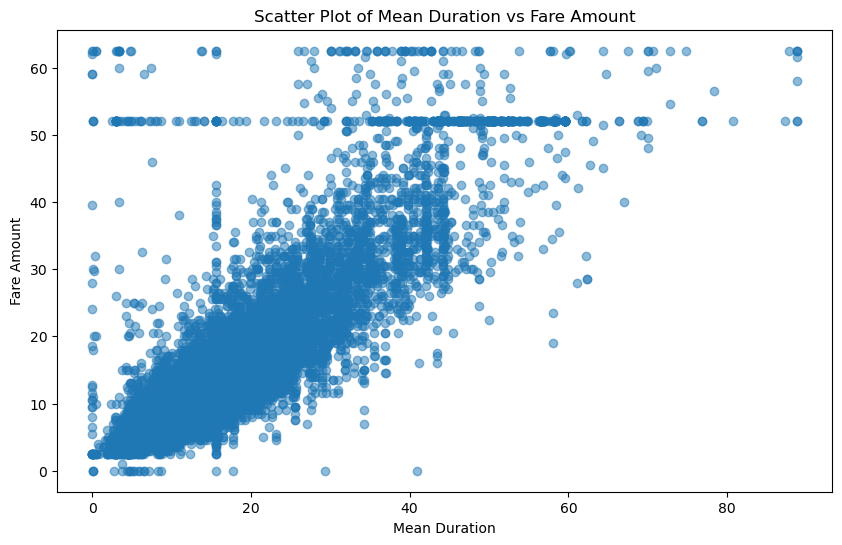

In [223]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
plt.scatter(df0['mean_duration'], df0['fare_amount'], alpha=0.5)
plt.title('Scatter Plot of Mean Duration vs Fare Amount')
plt.xlabel('Mean Duration')
plt.ylabel('Fare Amount')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [225]:
### YOUR CODE HERE ###

Examine the first 30 of these trips.

In [227]:
# Set pandas to display all columns
### YOUR CODE HERE ###
# Investigate the horizontal line at fare_amount around 52 dollars
line_value_1 = 52
line_value_2 = 63

# Count the number of occurrences at fare_amount ~52 and ~63
count_line_1 = df0[df0['fare_amount'].round() == line_value_1].shape[0]
count_line_2 = df0[df0['fare_amount'].round() == line_value_2].shape[0]

print(f"Number of rides with fare_amount around ${line_value_1}: {count_line_1}")
print(f"Number of rides with fare_amount around ${line_value_2}: {count_line_2}")

# Examine the first 30 of these trips for line_value_1
line_1_trips = df0[df0['fare_amount'].round() == line_value_1].head(30)
print(line_1_trips)

Number of rides with fare_amount around $52: 524
Number of rides with fare_amount around $63: 0
      Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
11      18600059         2  2017-03-05 19:15:30   2017-03-05 19:52:18   
110     47959795         1  2017-06-03 14:24:57   2017-06-03 15:31:48   
156    104881101         1  2017-12-11 10:21:18   2017-12-11 11:14:57   
161     95729204         2  2017-11-11 20:16:16   2017-11-11 20:17:14   
247    103404868         2  2017-12-06 23:37:08   2017-12-07 00:06:19   
356    108458749         2  2017-12-21 21:31:12   2017-12-21 22:11:58   
379     80479432         2  2017-09-24 23:45:45   2017-09-25 00:15:14   
388     16226157         1  2017-02-28 18:30:05   2017-02-28 19:09:55   
406     55253442         2  2017-06-05 12:51:58   2017-06-05 13:07:35   
449     65900029         2  2017-08-03 22:47:14   2017-08-03 23:32:41   
468     80904240         2  2017-09-26 13:48:26   2017-09-26 14:31:17   
520     33706214         2  

**Question:** What do you notice about the first 30 trips?

==> ENTER YOUR RESPONSE HERE

There is nothing unusual about the first 30 trips, one thing note is that most of the trips doen't fall under rush hour category.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [230]:
### YOUR CODE HERE ###
df_modeling = df0.drop(columns=['pickup_dropoff', 'PULocationID', 'DOLocationID', 'tpep_pickup_datetime'])

In [231]:
### YOUR CODE HERE ###
print(df_modeling.columns)

Index(['Unnamed: 0', 'VendorID', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'duration', 'mean_distance',
       'mean_duration', 'day', 'month', 'rush_hour'],
      dtype='object')


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

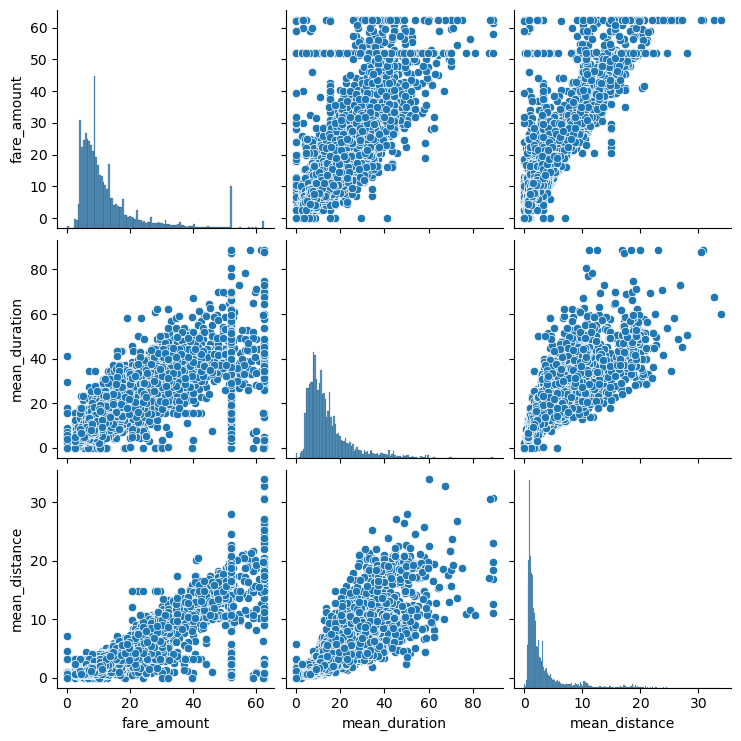

In [233]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###
sns.pairplot(df_modeling[['fare_amount', 'mean_duration', 'mean_distance']])
plt.show()

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [237]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
# Calculate the correlation matrix
correlation_matrix = df_modeling[['fare_amount', 'mean_duration', 'mean_distance']].corr()

# Display the correlation matrix
print(correlation_matrix)

               fare_amount  mean_duration  mean_distance
fare_amount       1.000000       0.859105       0.910185
mean_duration     0.859105       1.000000       0.874864
mean_distance     0.910185       0.874864       1.000000


Visualize a correlation heatmap of the data.

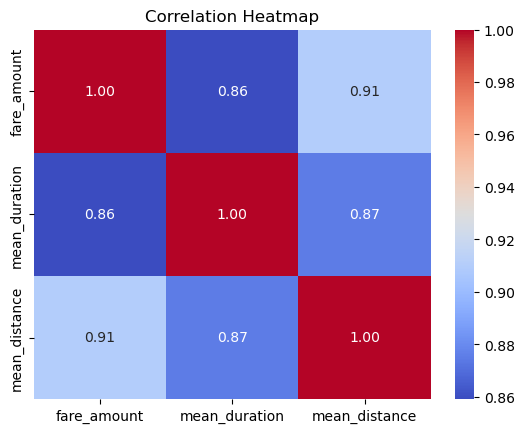

In [239]:
# Create correlation heatmap
### YOUR CODE HERE ###
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [243]:
### YOUR CODE HERE ###
# Split data into features (X) and outcome variable (y)
X = df_modeling.drop(columns='fare_amount')  # Features
y = df_modeling['fare_amount']  # Target variable

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [245]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
### YOUR CODE HERE ###

# Set y variable
### YOUR CODE HERE ###

# Display first few rows
### YOUR CODE HERE ###
print(X.head())
print(y.head())

   Unnamed: 0  VendorID tpep_dropoff_datetime  passenger_count  trip_distance  \
0    24870114         2   2017-03-25 09:09:47                6           3.34   
1    35634249         1   2017-04-11 15:19:58                1           1.80   
2   106203690         1   2017-12-15 07:34:08                1           1.00   
3    38942136         2   2017-05-07 13:48:14                1           3.70   
4    30841670         2   2017-04-15 23:49:03                1           4.37   

   RatecodeID store_and_fwd_flag  payment_type  extra  mta_tax  tip_amount  \
0           1                  N             1    0.0      0.5        2.76   
1           1                  N             1    0.0      0.5        4.00   
2           1                  N             1    0.0      0.5        1.45   
3           1                  N             1    0.0      0.5        6.39   
4           1                  N             2    0.5      0.5        0.00   

   tolls_amount  improvement_surcharge  tota

### Task 8b. Pre-process data


Dummy encode categorical variables

In [248]:
# Convert VendorID to string
### YOUR CODE HERE ###
df_modeling['VendorID'] = df_modeling['VendorID'].astype(str)

# Get dummies
### YOUR CODE HERE ###
# Dummy encode the categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Display the first few rows to confirm encoding
print(X_encoded.head())

   Unnamed: 0  VendorID tpep_dropoff_datetime  passenger_count  trip_distance  \
0    24870114         2   2017-03-25 09:09:47                6           3.34   
1    35634249         1   2017-04-11 15:19:58                1           1.80   
2   106203690         1   2017-12-15 07:34:08                1           1.00   
3    38942136         2   2017-05-07 13:48:14                1           3.70   
4    30841670         2   2017-04-15 23:49:03                1           4.37   

   RatecodeID  payment_type  extra  mta_tax  tip_amount  ...  month_December  \
0           1             1    0.0      0.5        2.76  ...           False   
1           1             1    0.0      0.5        4.00  ...           False   
2           1             1    0.0      0.5        1.45  ...            True   
3           1             1    0.0      0.5        6.39  ...           False   
4           1             2    0.5      0.5        0.00  ...           False   

   month_February  month_January

### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [251]:
# Create training and testing sets
#### YOUR CODE HERE ####
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Confirm the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (18159, 35), X_test shape: (4540, 35)
y_train shape: (18159,), y_test shape: (4540,)


### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [253]:
# Standardize the X variables
### YOUR CODE HERE ###

### Fit the model

Instantiate your model and fit it to the training data.

In [295]:
# Fit your model to the training data
### YOUR CODE HERE ###
# Drop DateTime and boolean columns from both train and test sets
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Convert the scaled data back to DataFrames with original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns, index=X_train_numeric.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns, index=X_test_numeric.index)

# Display the first few rows of the scaled DataFrames
print("First few rows of scaled training DataFrame:")
print(X_train_scaled_df.head())

print("\nFirst few rows of scaled test DataFrame:")
print(X_test_scaled_df.head())

First few rows of scaled training DataFrame:
       Unnamed: 0  VendorID  passenger_count  trip_distance  RatecodeID  \
252     -0.780109  0.892866        -0.503015       0.847078   -0.058126   
16220   -0.700010  0.892866        -0.503015      -0.614489   -0.058126   
9795    -0.389790 -1.119989         0.273311      -0.412705   -0.058126   
1972    -1.660283 -1.119989        -0.503015      -0.658118   -0.058126   
21092   -0.140354 -1.119989        -0.503015      -0.521778   -0.058126   

       payment_type     extra   mta_tax  tip_amount  tolls_amount  \
252        1.339546  0.361464  0.065472   -0.636063     -0.224936   
16220     -0.680116 -0.722749  0.065472   -0.291823     -0.224936   
9795      -0.680116  0.361464  0.065472   -0.291823     -0.224936   
1972      -0.680116  1.445677  0.065472   -0.636063     -0.224936   
21092     -0.680116  1.445677  0.065472    0.000782     -0.224936   

       improvement_surcharge  total_amount  duration  mean_distance  \
252               

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [301]:
# Evaluate the model performance on the training data
### YOUR CODE HERE ###
# Instantiate the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [305]:
X_train_scaled_df.head()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,mean_distance,mean_duration,rush_hour
252,-0.780109,0.892866,-0.503015,0.847078,-0.058126,1.339546,0.361464,0.065472,-0.636063,-0.224936,0.028635,0.266512,0.151118,0.869468,0.176167,-0.648933
16220,-0.700010,0.892866,-0.503015,-0.614489,-0.058126,-0.680116,-0.722749,0.065472,-0.291823,-0.224936,0.028635,-0.599877,-0.956110,-0.600113,-0.698296,1.540990
9795,-0.389790,-1.119989,0.273311,-0.412705,-0.058126,-0.680116,0.361464,0.065472,-0.291823,-0.224936,0.028635,-0.450500,-0.740816,-0.478292,-0.573019,-0.648933
1972,-1.660283,-1.119989,-0.503015,-0.658118,-0.058126,-0.680116,1.445677,0.065472,-0.636063,-0.224936,0.028635,-0.570002,-0.809319,-0.562814,-0.780530,1.540990
21092,-0.140354,-1.119989,-0.503015,-0.521778,-0.058126,-0.680116,1.445677,0.065472,0.000782,-0.224936,0.028635,-0.310085,-0.472397,-0.561726,-0.811930,1.540990


In [307]:
X_test_scaled_df.head()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,mean_distance,mean_duration,rush_hour
5818,1.385232,0.892866,-0.503015,0.048124,-0.058126,-0.680116,0.361464,0.065472,0.224538,-0.224936,0.028635,0.087259,0.302104,-0.012280,-0.110966,-0.648933
18134,-0.188052,0.892866,-0.503015,0.323531,-0.058126,1.339546,-0.722749,0.065472,-0.636063,-0.224936,0.028635,0.744520,2.777989,0.170578,0.832667,-0.648933
4655,-1.279493,0.892866,0.273311,-0.598128,-0.058126,-0.680116,-0.722749,0.065472,-0.202320,-0.224936,0.028635,-0.524591,-0.715652,-0.568009,-0.711635,-0.648933
7378,-1.241337,0.892866,-0.503015,0.429877,-0.058126,1.339546,0.361464,0.065472,-0.636063,-0.224936,0.028635,0.027508,0.128750,0.456095,0.077282,-0.648933
13914,-1.688420,-1.119989,0.273311,-0.249097,-0.058126,1.339546,-0.722749,0.065472,-0.636063,-0.224936,0.028635,-0.360873,-0.210968,-0.262502,-0.170858,-0.648933


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [148]:
# Scale the X_test data
### YOUR CODE HERE ###

In [309]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###
y_train_pred = model.predict(X_train_scaled_df)

# Calculate evaluation metrics for training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training MAE: {mae_train}")
print(f"Training MSE: {mse_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Training R^2: {r2_train}")

# Evaluate the model performance on the testing data
y_test_pred = model.predict(X_test_scaled_df)

# Calculate evaluation metrics for testing data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Testing MAE: {mae_test}")
print(f"Testing MSE: {mse_test}")
print(f"Testing RMSE: {rmse_test}")
print(f"Testing R^2: {r2_test}")

Training MAE: 0.9580568936045749
Training MSE: 7.704464647350561
Training RMSE: 2.7756917421339424
Training R^2: 0.9310263370329657
Testing MAE: 0.8924578462985416
Testing MSE: 4.401601778737298
Testing RMSE: 2.0979994706236935
Testing R^2: 0.9595242331280007


C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [311]:
# Create a `results` dataframe
### YOUR CODE HERE ###
# Create a `results` DataFrame
results = pd.DataFrame({
    'actual': y_test,
    'predicted': y_test_pred,
    'residual': y_test - y_test_pred
})

# Display the first few rows of the results
print(results.head())

       actual  predicted  residual
5818     14.0  13.849510  0.150490
18134    28.0  24.907704  3.092296
4655      5.5   6.265034 -0.765034
7378     15.5  15.854696 -0.354696
13914     9.5  10.120494 -0.620494


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

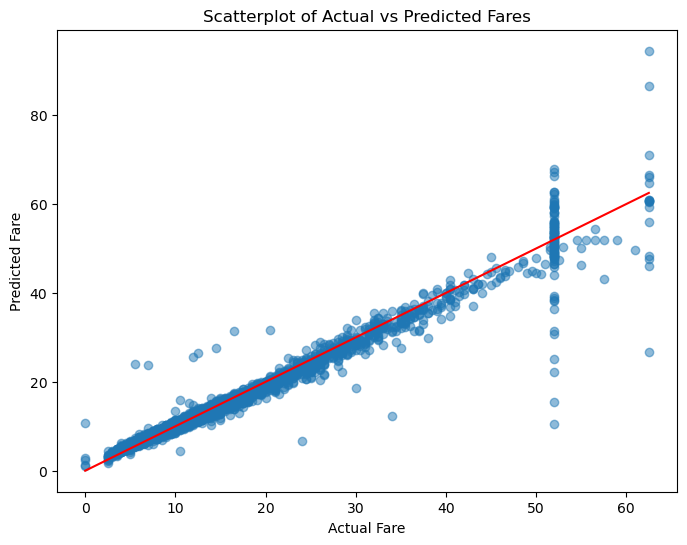

In [313]:
# Create a scatterplot to visualize `predicted` over `actual`
### YOUR CODE HERE ###
# Scatterplot of predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(results['actual'], results['predicted'], alpha=0.5)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Scatterplot of Actual vs Predicted Fares')
plt.plot([results['actual'].min(), results['actual'].max()], [results['actual'].min(), results['actual'].max()], color='red')  # Line of perfect prediction
plt.show()

Visualize the distribution of the `residuals` using a histogram.

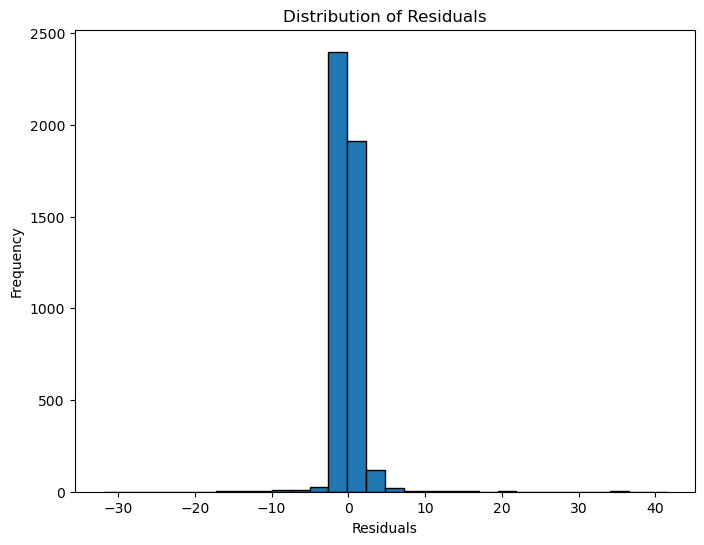

Mean of residuals: -0.004775744368716677


In [315]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###
# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(results['residual'], bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Calculate the mean of residuals
residual_mean = results['residual'].mean()
print(f"Mean of residuals: {residual_mean}")

In [ ]:
# Calculate residual mean
### YOUR CODE HERE ###


Create a scatterplot of `residuals` over `predicted`.

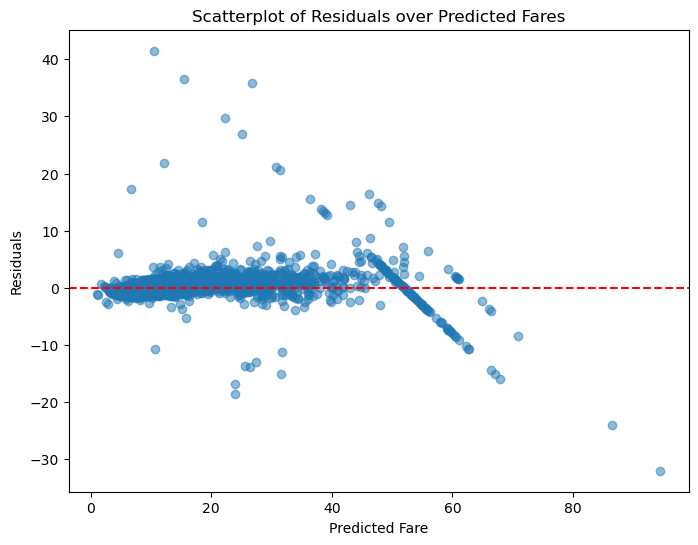

In [317]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
plt.scatter(results['predicted'], results['residual'], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals')
plt.title('Scatterplot of Residuals over Predicted Fares')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [325]:
# Output the model's coefficients
# Output the model's coefficients
coefficients = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Coefficient': model.coef_
})

# Sort coefficients by their absolute values to see which has the greatest effect
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Display the coefficients
print(coefficients[['Feature', 'Coefficient']])

                  Feature  Coefficient
11           total_amount     3.770034
3           trip_distance     3.760916
12               duration     2.546013
13          mean_distance     1.418198
8              tip_amount    -1.416389
4              RatecodeID     0.509822
7                 mta_tax    -0.473847
5            payment_type    -0.348331
14          mean_duration     0.347216
10  improvement_surcharge     0.294826
9            tolls_amount     0.255930
6                   extra    -0.132674
1                VendorID    -0.054726
15              rush_hour    -0.028393
0              Unnamed: 0     0.003417
2         passenger_count     0.001667


What do these coefficients mean? How should they be interpreted?

==> ENTER YOUR RESPONSE HERE 
1. The major features in detrmining the output are 'trip_distance', 'duration', 'mean_distance' an 'tip_amount'. The model does a pretty good job in predicting the target variable as we see most of the residuals are arround zero and the best fit line covers most of the target.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



==> ENTER YOUR RESPONSE HERE 
1. The major features in detrmining the output are 'trip_distance', 'duration', 'mean_distance' an 'tip_amount'. The model does a pretty good job in predicting the target variable as we see most of the residuals are arround zero and the best fit line covers most of the target.
2. We have succesfully predicted the fare amount for most of trips, scoring a descent score in all metrics.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 